# Análise de dados sobre saúde do sono e estilo de vida

### Insights sobre padrões de sono e hábitos diários

# Visão geral do projeto:
O Sleep Health and Lifestyle Dataset fornece insights detalhados sobre os padrões de sono, hábitos diários e fatores de estilo de vida dos indivíduos. Essa etapa do projeto compreende dados já tratados e organizados para facilitar as análises. 

Essa análise tem como objetivo produzir insights a partir de métricas essenciais como duração do sono, qualidade do sono, níveis de atividade física, estresse, categoria de IMC, saúde cardiovascular e presença de distúrbios do sono.

# Fontes dos dados

Os dados foram obtidos no kaggle através do [link](https://www.kaggle.com/code/winterbearballu/sleep-health-and-lifestyle-eda)

Obs: este conjunto de dados é gerado sinteticamente e se destina exclusivamente a propósitos ilustrativos e educacionais. Ele visa fornecer uma estrutura realista para explorar e analisar correlações entre sono, hábitos de estilo de vida e métricas de saúde.

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations
from pprint import pprint

from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import kruskal


from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS_ML

In [9]:
df = pd.read_csv(DADOS_ORIGINAIS)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [11]:
df.describe()

,Person ID,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,39.950000,8.041250,6.125750,64.985000,5.47250,75.990000,11076.510000
std,115.614301,14.038883,2.390787,1.975733,32.297874,2.80873,15.099334,5364.789364
min,1.000000,18.000000,4.100000,1.000000,10.000000,1.00000,50.000000,2067.000000
25%,100.750000,29.000000,5.900000,4.700000,35.000000,3.00000,63.000000,6165.250000
50%,200.500000,40.000000,8.200000,6.100000,65.500000,5.00000,77.000000,11785.500000
75%,300.250000,49.000000,10.125000,7.425000,94.000000,8.00000,90.000000,15878.000000
max,400.000000,90.000000,12.000000,10.000000,120.000000,10.00000,100.000000,19958.000000


A primeira vista, não é possível identificar nenhum parâmetro que possa afetar diretamente na performance do modelo, exceto a coluna "Person ID" que se trata de uma coluna de identificação e será removida.

In [13]:
df.describe(exclude="number")

,Gender,Occupation,BMI Category,Blood Pressure (systolic/diastolic),Sleep Disorder
count,400,400,400,400,110
unique,2,4,4,250,2
top,Female,Student,Overweight,109/60,Insomnia
freq,201,110,109,17,79


Colunas categoricas serão devidamente tratadas e categorizadas afim de obter informações mais limpas para o modelo.

Além disso, vamos checar possíveis valores nulos nos dados:

In [15]:
df.isnull().sum()

Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64

In [16]:
df["Sleep Disorder"].unique()

array([nan, 'Insomnia', 'Sleep Apnea'], dtype=object)

In [17]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("No sleep disturbance")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

Na coluna alvo, valores nulos, que indicavam a não ocorrência de desordem de sono, foram padronizados para 'No sleep Disturbance'

In [19]:
# Retirando coluna ID
df = df.drop(columns="Person ID")

Removida a coluna ID, será dividida a coluna "Blood Pressure (Systolic/diastolic)" para facilitar a leitura dos dados

In [21]:
df[["Systolic", "Diastolic"]] = df["Blood Pressure (systolic/diastolic)"].str.split('/', expand=True).astype(int)

df = df.drop("Blood Pressure (systolic/diastolic)", axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 400 non-null    object 
 1   Age                                    400 non-null    int64  
 2   Occupation                             400 non-null    object 
 3   Sleep Duration (hours)                 400 non-null    float64
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64
 5   Physical Activity Level (minutes/day)  400 non-null    int64  
 6   Stress Level (scale: 1-10)             400 non-null    int64  
 7   BMI Category                           400 non-null    object 
 8   Heart Rate (bpm)                       400 non-null    int64  
 9   Daily Steps                            400 non-null    int64  
 10  Sleep Disorder                         400 non-null    object 
 11  Systol

In [22]:
# Verificando se há valores duplicados

df[df.duplicated()]

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic,Diastolic


Não havendo valores duplicados, agora será categorizado os dados não-numéricos e a quantidade de valores únicos darão uma perspectiva de quais são:

In [24]:
df.nunique().sort_values()

Gender                                     2
Sleep Disorder                             3
Occupation                                 4
BMI Category                               4
Stress Level (scale: 1-10)                10
Systolic                                  36
Diastolic                                 37
Heart Rate (bpm)                          51
Age                                       59
Quality of Sleep (scale: 1-10)            79
Sleep Duration (hours)                    80
Physical Activity Level (minutes/day)    108
Daily Steps                              393
dtype: int64

In [25]:
# Colunas categóricas não ordenadas

df["Gender"] = pd.Categorical(df["Gender"])
df["Sleep Disorder"] = pd.Categorical(df["Sleep Disorder"])
df["Occupation"] = pd.Categorical(df["Occupation"])

In [26]:
# Colunas categóricas ordenadas

df["BMI Category"].unique()

array(['Obese', 'Underweight', 'Overweight', 'Normal'], dtype=object)

In [27]:
order_cat_BMI = ["Underweight", "Normal", "Overweight", "Obese"]

df["BMI Category"] = pd.Categorical(df["BMI Category"], categories=order_cat_BMI, ordered=True)

df["BMI Category"].unique()

['Obese', 'Underweight', 'Overweight', 'Normal']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int64   
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float64 
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64 
 5   Physical Activity Level (minutes/day)  400 non-null    int64   
 6   Stress Level (scale: 1-10)             400 non-null    int64   
 7   BMI Category                           400 non-null    category
 8   Heart Rate (bpm)                       400 non-null    int64   
 9   Daily Steps                            400 non-null    int64   
 10  Sleep Disorder                         400 non-null    categor

Com os dados devidamente categorizados, passaremos a uma análise mais visual da distribuição dos dados utilizando o gráfico de pares:

In [30]:
#sns.pairplot(df, diag_kind="kde", corner=True, hue= "Sleep Disorder")

O objetivo principal de um pairplot é visualizar rapidamente as relações de pares entre várias variáveis em um conjunto de dados e, nesse caso, podemos observar algumas correlações como as colunas Systolic/Diastolic com a Idade. Entretanto, não está claro uma diferença das colunas em relação ao Target.

Podemos explorar outras visualizações gráficas afim de obter mais informações desse conjunto de dados. Neste momento, vamos avaliar a assimetria e os Outliers desse conjunto de dados.

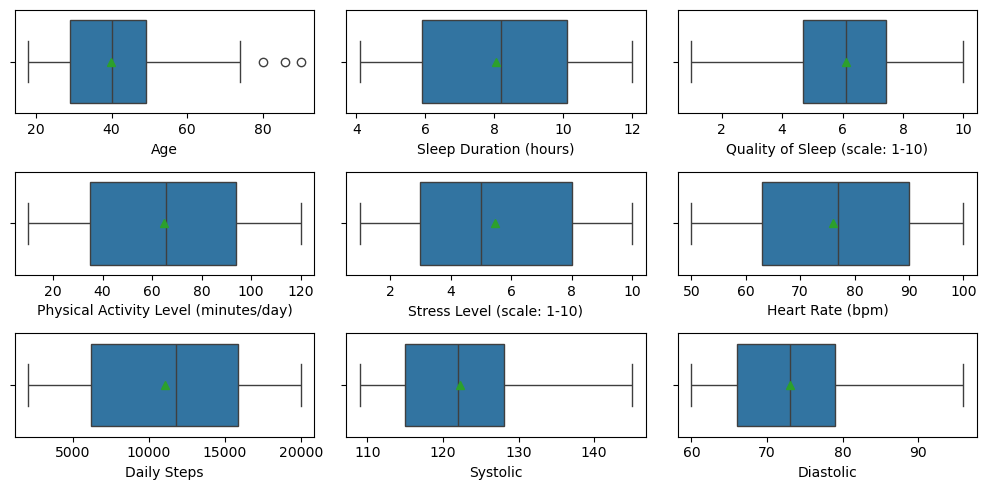

In [32]:
# Boxplot

fig,axs = plt.subplots(3,3, figsize=(10,5))

for ax, coluna in zip(axs.flatten(), df.select_dtypes(include="number")):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True)

plt.tight_layout()

plt.show()

Quanto aos Outliers, podemos observar apenas alguns para idades mais avançadas. O fato de haver poucos influencia nas médias (triângulo), que estão bem próximas das medianas (linha central da caixa).

Agora, avaliaremos a correlação entre as colunas numéricas, porém, antes, será necessário avaliar se os dados possuem normalidade.

In [34]:
def shapiro_wilk(columns: list[str], alpha: float = 0.05):
    results = []
    for column in columns:
        statistic, p_value = shapiro(df[column], nan_policy="omit")
        results.append(
            {
                "coluna": column,
                "estatistica": statistic,
                "valor_p": p_value,
                "normal": p_value > alpha,
            }
        )
    return pd.DataFrame(results)

In [35]:
shapiro_wilk(columns=df.select_dtypes(include="number").columns)

,coluna,estatistica,valor_p,normal
0,Age,0.973199,9.903227e-07,False
1,Sleep Duration (hours),0.943316,3.122426e-11,False
2,Quality of Sleep (scale: 1-10),0.990094,8.489822e-03,False
3,Physical Activity Level (minutes/day),0.950136,2.291774e-10,False
4,Stress Level (scale: 1-10),0.935786,4.112905e-12,False
5,Heart Rate (bpm),0.945786,6.306589e-11,False
6,Daily Steps,0.941059,1.670827e-11,False
7,Systolic,0.975257,2.493606e-06,False
8,Diastolic,0.962603,1.443362e-08,False


Dados negativos para normalidade, ou seja, análise de correlação deverá ser realizada pelo coeficiente de Spearman

In [37]:
df.select_dtypes("number").corr(method="spearman")

,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps,Systolic,Diastolic
Age,1.000000,0.075023,-0.005950,0.035099,0.058614,0.017417,0.013770,0.844889,0.728087
Sleep Duration (hours),0.075023,1.000000,-0.008982,0.051808,0.052697,0.005643,-0.053060,0.072087,0.074782
Quality of Sleep (scale: 1-10),-0.005950,-0.008982,1.000000,-0.045989,-0.033403,0.065133,-0.042893,-0.012950,-0.034048
Physical Activity Level (minutes/day),0.035099,0.051808,-0.045989,1.000000,-0.001639,-0.061269,0.015784,0.058487,0.010997
Stress Level (scale: 1-10),0.058614,0.052697,-0.033403,-0.001639,1.000000,0.077337,-0.025186,0.066010,0.054292
Heart Rate (bpm),0.017417,0.005643,0.065133,-0.061269,0.077337,1.000000,-0.027109,0.000815,0.020340
Daily Steps,0.013770,-0.053060,-0.042893,0.015784,-0.025186,-0.027109,1.000000,-0.000767,0.031501
Systolic,0.844889,0.072087,-0.012950,0.058487,0.066010,0.000815,-0.000767,1.000000,0.854073
Diastolic,0.728087,0.074782,-0.034048,0.010997,0.054292,0.020340,0.031501,0.854073,1.000000


<Axes: >

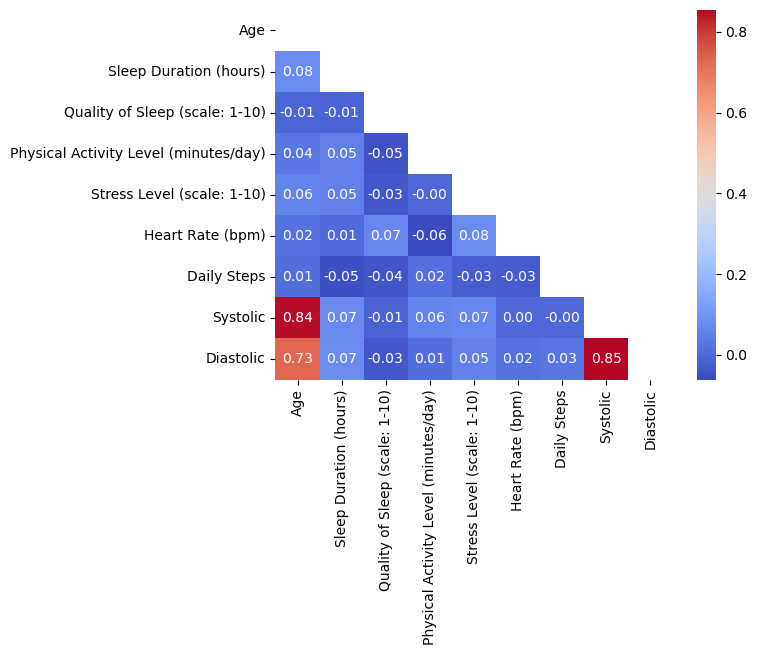

In [38]:
# Correlação numéricas

matriz = np.triu(df.select_dtypes("number").corr(method="spearman"))

fig, ax = plt.subplots()

sns.heatmap(df.select_dtypes("number").corr(method="spearman"), mask=matriz, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")

Conforme observado pelos dados de correlação, corroborado com o gráfico de pares (pairplot), as correlações mais altas para as colunas Idade x Systolic/Diastolic e Systolic x Diastolic.

Para avaliarmos a correlação entre colunas categoricas, será necessário alguns passos até mensurar o quão forte é a correlação a partir da métrica de "V de Cramer" para colunas categóricas.

In [40]:
# Criando tabelas de contingencia

colunas_categoricas = df.select_dtypes("category").columns

pares_contingencia = combinations(colunas_categoricas,2)

tabela_contingencia={}

for coluna, linha in pares_contingencia:
    tabela_contingencia[f"{coluna} x {linha}"] = pd.crosstab(df[coluna], df[linha])

In [41]:
# Aplicar o teste Qui-quadrado, necessário para o cálculo do método "V de Cramer".

resultado_chi = {}

for coluna, tabela in tabela_contingencia.items():
    chi_2, valor_p, _, _ = chi2_contingency(tabela)
    resultado_chi[coluna] = {"Chi_2": chi_2, "Valor_p": valor_p}

df_tabelas_chi2 = pd.DataFrame(resultado_chi).T

df_tabelas_chi2

,Chi_2,Valor_p
Gender x Occupation,6.680810,0.082798
Gender x BMI Category,1.152177,0.764496
Gender x Sleep Disorder,1.024739,0.599074
Occupation x BMI Category,2.430191,0.982702
Occupation x Sleep Disorder,7.189117,0.303711
BMI Category x Sleep Disorder,4.805361,0.569009


Não houve diferenças significativas para o nível de significância de 5% (p > 0.05) para nenhuma das colunas categoricas.

Entretanto, prosseguiremos calculando o V de Cramer para avaliar a magnitude da associação (o quão correlacionadas estão), independentemente da significância.

In [43]:
# Calculando correlação entre colunas categóricas utilizando V de Cramer

n = len(df)
v_cramer= {}

for coluna, valores in resultado_chi.items():
    v_cramer[coluna] = np.sqrt((valores["Chi_2"])/(n*min(tabela_contingencia[coluna].shape[0] - 1, tabela_contingencia[coluna].shape[1]-1)))

v_cramer

{'Gender x Occupation': np.float64(0.12923631741030822),
 'Gender x BMI Category': np.float64(0.05366975919004921),
 'Gender x Sleep Disorder': np.float64(0.05061470376083845),
 'Occupation x BMI Category': np.float64(0.045001763990640944),
 'Occupation x Sleep Disorder': np.float64(0.0947966051377915),
 'BMI Category x Sleep Disorder': np.float64(0.07750291050812531)}

In [44]:
# Melhorando visualização

variaveis = df.select_dtypes("category").columns
matriz_v = pd.DataFrame(index=variaveis, columns=variaveis, dtype=float)

for chave, valor in v_cramer.items():
    linha, coluna = chave.split(" x ")
    matriz_v.loc[linha, coluna] = valor
    matriz_v.loc[coluna, linha] = valor

np.fill_diagonal(matriz_v.values, 1)

matriz_v

,Gender,Occupation,BMI Category,Sleep Disorder
Gender,1.000000,0.129236,0.053670,0.050615
Occupation,0.129236,1.000000,0.045002,0.094797
BMI Category,0.053670,0.045002,1.000000,0.077503
Sleep Disorder,0.050615,0.094797,0.077503,1.000000


<Axes: >

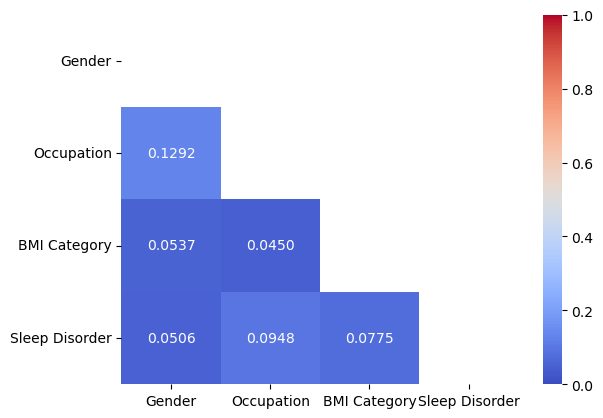

In [45]:
# Gerando gráfico de correlação

matriz = np.triu(matriz_v)

fig, ax = plt.subplots()

sns.heatmap(matriz_v, mask=matriz, annot=True, fmt=".4f", cmap="coolwarm", vmin=0, vmax=1, ax=ax)

Conforme acima, foi observado uma baixa correlação entre colunas categóricas, assim como nas numéricas, fazendo com que seja necessário a criação de novas colunas afim de melhorarmos a correlação dos dados e obtermos um modelo com melhor capacidade preditiva.

### Criação de novas colunas

In [48]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration (hours)',
       'Quality of Sleep (scale: 1-10)',
       'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)',
       'BMI Category', 'Heart Rate (bpm)', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic'],
      dtype='object')

In [49]:
# Criação de novas colunas numéricas

df["daily_physical_intensity"] = df["Physical Activity Level (minutes/day)"] / (24 - df["Sleep Duration (hours)"]) #Indica o quanto da parte acordada do dia é usada em atividade física.

df["steps_per_hour_awake"] = df["Daily Steps"] / (24 - df["Sleep Duration (hours)"]) #Quanto maior, melhor a recuperação cardiovascular durante o sono.

df["effective_sleep"] = df["Sleep Duration (hours)"] * df["Quality of Sleep (scale: 1-10)"] # Quantidade associado a qualidade

df["stress_index"] = df["Heart Rate (bpm)"] * df["Stress Level (scale: 1-10)"] # Combina frequência cardíaca com estresse percebido 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int64   
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float64 
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64 
 5   Physical Activity Level (minutes/day)  400 non-null    int64   
 6   Stress Level (scale: 1-10)             400 non-null    int64   
 7   BMI Category                           400 non-null    category
 8   Heart Rate (bpm)                       400 non-null    int64   
 9   Daily Steps                            400 non-null    int64   
 10  Sleep Disorder                         400 non-null    categor

In [50]:
# Antes de prosseguirmos, notei que algumas das novas colunas estão com muitas casas depois da virgula. reduziremos afim de reduzir o número de operações

df["daily_physical_intensity"] = df["daily_physical_intensity"].round(2)

df["steps_per_hour_awake"] = df["steps_per_hour_awake"].round(2)

df

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic,Diastolic,daily_physical_intensity,steps_per_hour_awake,effective_sleep,stress_index
0,Male,29,Manual Labor,7.4,7.0,41,7,Obese,91,8539,No sleep disturbance,124,70,2.47,514.40,51.80,637
1,Female,43,Retired,4.2,4.9,41,5,Obese,81,18754,No sleep disturbance,131,86,2.07,947.17,20.58,405
2,Male,44,Retired,6.1,6.0,107,4,Underweight,81,2857,No sleep disturbance,122,70,5.98,159.61,36.60,324
3,Male,29,Office Worker,8.3,10.0,20,10,Obese,55,6886,No sleep disturbance,124,72,1.27,438.60,83.00,550
4,Male,67,Retired,9.1,9.5,19,4,Overweight,97,14945,Insomnia,133,78,1.28,1003.02,86.45,388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Female,36,Student,4.5,7.9,73,7,Normal,64,14497,Sleep Apnea,118,66,3.74,743.44,35.55,448
396,Female,45,Manual Labor,6.0,6.1,72,8,Obese,65,12848,Insomnia,132,80,4.00,713.78,36.60,520
397,Female,30,Student,5.3,6.5,58,10,Obese,66,15255,Insomnia,125,76,3.10,815.78,34.45,660
398,Female,41,Retired,11.0,9.1,73,9,Obese,75,6567,Sleep Apnea,130,75,5.62,505.15,100.10,675


<Axes: >

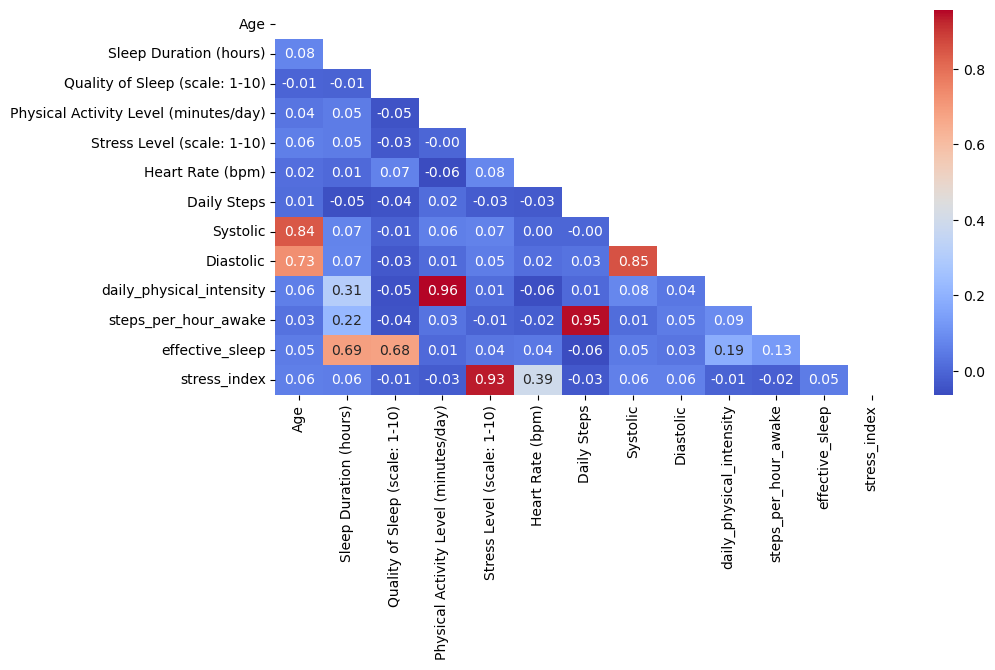

In [51]:
# Vamos verificar se a inclusão dessas novas colunas proporcionou melhoria na correlação

matriz = np.triu(df.select_dtypes("number").corr(method="spearman"))

fig, ax = plt.subplots(figsize = (10,5))

sns.heatmap(df.select_dtypes("number").corr(method="spearman"), mask=matriz, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")

Com a criação de novas colunas percebemos melhora na correlação entre as variáveis, porém é necessário ainda verificar se essas mudanças proporcionaram aumento na correlação em relação ao target.

Para isso, avaliaremos as variáveis numéricas com o target utilizando o teste de Kruskal-Wallis que é uma versão não-paramétrica que não exige normalidade dos dados e permite avaliar variáveis com 3 ou mais classes.

In [53]:
df["Sleep Disorder"].unique()

['No sleep disturbance', 'Insomnia', 'Sleep Apnea']
Categories (3, object): ['Insomnia', 'No sleep disturbance', 'Sleep Apnea']

In [54]:
def kruskal_w(columns: list[str], alpha: float = 0.05):
    results = []
    for column in columns:
        nenhum = df[df['Sleep Disorder'] == "No sleep disturbance"][column]
        insonia = df[df['Sleep Disorder'] == "Insomnia"][column]
        apneia = df[df['Sleep Disorder'] == "Sleep Apnea"][column]
        
        statistic, p_value = kruskal(nenhum, insonia, apneia, nan_policy="omit")
        results.append(
            {
                "coluna": column,
                "estatística": statistic,
                "valor_p": p_value,
                "significativo": p_value <= alpha,
            }
        )
    return pd.DataFrame(results)

In [55]:
kruskal_w(columns=df.select_dtypes(include="number").columns)

,coluna,estatística,valor_p,significativo
0,Age,0.830658,0.660123,False
1,Sleep Duration (hours),0.768055,0.681113,False
2,Quality of Sleep (scale: 1-10),0.150924,0.927315,False
3,Physical Activity Level (minutes/day),9.144845,0.010333,True
4,Stress Level (scale: 1-10),1.385414,0.500220,False
5,Heart Rate (bpm),0.026756,0.986711,False
6,Daily Steps,5.276114,0.071500,False
7,Systolic,0.703407,0.703489,False
8,Diastolic,0.836382,0.658236,False
9,daily_physical_intensity,6.045299,0.048672,True


Conforme acima, podemos notar que as variáveis "Physical Activity Level (minutes/day)", "daily_physical_intensity", "steps_per_hour_awake" apresentam diferença estatística significativa, o que pode levar a um potencial poder preditivo por parte dessas variáveis com relação ao target.

Partindo desses resultados obtidos pelas modificações da base de dados já podemos prosseguir para a elaboração do modelo. Porém, antes, realizaremos alguns tratamentos afim de reduzir o tamanho da base de dados.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int64   
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float64 
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64 
 5   Physical Activity Level (minutes/day)  400 non-null    int64   
 6   Stress Level (scale: 1-10)             400 non-null    int64   
 7   BMI Category                           400 non-null    category
 8   Heart Rate (bpm)                       400 non-null    int64   
 9   Daily Steps                            400 non-null    int64   
 10  Sleep Disorder                         400 non-null    categor

In [58]:
# Reduzindo bits das colunas numéricas

colunas_inteiras = df.select_dtypes(include="int64").columns

df[colunas_inteiras] = df[colunas_inteiras].apply(pd.to_numeric, downcast="integer")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int8    
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float64 
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64 
 5   Physical Activity Level (minutes/day)  400 non-null    int8    
 6   Stress Level (scale: 1-10)             400 non-null    int8    
 7   BMI Category                           400 non-null    category
 8   Heart Rate (bpm)                       400 non-null    int8    
 9   Daily Steps                            400 non-null    int16   
 10  Sleep Disorder                         400 non-null    categor

In [59]:
# Reduzindo bits das colunas categóricas

colunas_categoricas = df.select_dtypes(include="float64").columns

df[colunas_categoricas] = df[colunas_categoricas].apply(pd.to_numeric, downcast="float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int8    
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float32 
 4   Quality of Sleep (scale: 1-10)         400 non-null    float32 
 5   Physical Activity Level (minutes/day)  400 non-null    int8    
 6   Stress Level (scale: 1-10)             400 non-null    int8    
 7   BMI Category                           400 non-null    category
 8   Heart Rate (bpm)                       400 non-null    int8    
 9   Daily Steps                            400 non-null    int16   
 10  Sleep Disorder                         400 non-null    categor

Conforme acima, houve redução significativa no tamanho da base.

In [60]:
df = df.to_parquet(DADOS_TRATADOS_ML, index=False)